##Importing Libraries and data

In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'colab'

In [3]:
data = pd.read_csv('/content/drive/MyDrive/ml/oasis/task 2 Unemployment Analysis/Unemployment_Rate_upto_11_2020.csv')
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [5]:
data.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [6]:
data.duplicated().sum()

0

##Insights

In [7]:
data = data.rename(columns = {' Estimated Employed': 'EE',' Estimated Unemployment Rate (%)':'EUR',' Estimated Labour Participation Rate (%)':'ELR',
                              'longitude':'lat',
                              'latitude':'lon'})
data.head()

,Region,Date,Frequency,EUR,EE,ELR,Region.1,lat,lon
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [23]:
fig = px.scatter_geo(data,lat='lat',lon='lon',size='EUR',animation_frame=' Date',hover_name=data.Region)
fig.update_layout(title='Unemployment rate in each state in india')

from scatter_geo plot I analysed the following points:

1. Harayana,Tripura,Delhi,jammu and kashmir are having more Unemployment rate except in 4th and 5th month.
2. In 4th and 5th months the unemployment rate is increased in every region.
3. Unemployment rate in Andhra pradesh, kerla, Telangana, karnataka is low when compared to other regions and for regions Tamilnadu and puducherry Unemployment rate is low except in 4th and 5th month.

In [9]:
fig = px.bar(data,x='Region',y='EE',animation_frame=' Date',color='Region.1')
fig.update_layout(
    xaxis = dict(
        tickangle = -45,
        tickfont = dict(
            family = 'Congential',
            size = 12
        )
    ),
    title = dict(
        text = 'Estimated Employed',
        font = dict(
            family = 'Congential',
            size = 20,
        )
    )
)

from above bar plot I analyzed following points:

1. In South side of india, Karnataka and Tamilnadu have more number of employees.
2. In Northeast side of india, Assam has more number of employees.
3. In East side of India, West Bengal has more number of employees and secondly the Bihar has more number of employess.
4. In West side of India,Maharastra has more number of employees and secondly the gujarat has more number of employess.
5. In North side of India, Uttar pradesh has more number of employees.

By comparing all sides of India, Uttar pradesh has more number of employees

In [10]:
data_reg = data.groupby('Region').mean()
data_reg

,EUR,EE,ELR,lat,lon
Region,,,,,
Andhra Pradesh,8.664000,1.542548e+07,38.962000,15.9129,79.7400
Assam,4.856000,1.081028e+07,43.498000,26.2006,92.9376
Bihar,19.471000,2.360683e+07,37.173000,25.0961,85.3131
Chhattisgarh,7.819000,8.421349e+06,41.161000,21.2787,81.8661
Delhi,18.414000,4.632822e+06,35.857000,28.7041,77.1025
Goa,12.167000,4.423748e+05,39.242000,15.2993,74.1240
Gujarat,6.376000,2.273075e+07,45.490000,22.2587,71.1924
Haryana,27.477000,6.844059e+06,42.100000,29.0588,76.0856
Himachal Pradesh,16.065000,2.033885e+06,40.252000,31.1048,77.1734


In [14]:
fig = px.bar(data_reg,x=data_reg.index,y='ELR',color=data_reg.index)
fig.update_layout(
    title = dict(
        text = 'Estimated Labour Participation Rate',
        font = dict(
            family = 'Congential',
            size = 20
        )
        ),
    xaxis = dict(
        title='States',
        titlefont = dict(
            family = 'Congential',
            size = 15
        )
    ),
    yaxis = dict(
        title='Average Labour participation rate',
        titlefont = dict(
            family = 'Congential',
            size = 15
        ),
        gridwidth = 3,
        gridcolor = 'rgb(100, 101, 105)'
    ),
    showlegend = False,
    plot_bgcolor = 'rgb(251, 250, 241)',
    paper_bgcolor = 'rgb(251, 250, 241)'
)

from above bar plot, I analysed following points,

1. Meghalaya, Telangana and Tripura have high Estimated Labour Participation Rate.
2. Kerla has low Estimated Labour Participation Rate.

In [15]:
data1 = pd.read_csv('/content/drive/MyDrive/ml/oasis/task 2 Unemployment Analysis/Unemployment in India.csv')
data1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [16]:
data1 = data1.rename(columns = {' Estimated Employed': 'EE',' Estimated Unemployment Rate (%)':'EUR',' Estimated Labour Participation Rate (%)':'ELR',})
data1.head()

,Region,Date,Frequency,EUR,EE,ELR,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [17]:
data1.isna().sum()

Region        28
 Date         28
 Frequency    28
EUR           28
EE            28
ELR           28
Area          28
dtype: int64

In [18]:
data1 = data1.dropna()

In [19]:
data1.duplicated().sum()

0

Text(0.5, 0.98, 'Unemployement, Employement and Labour in Rural vs Urban')

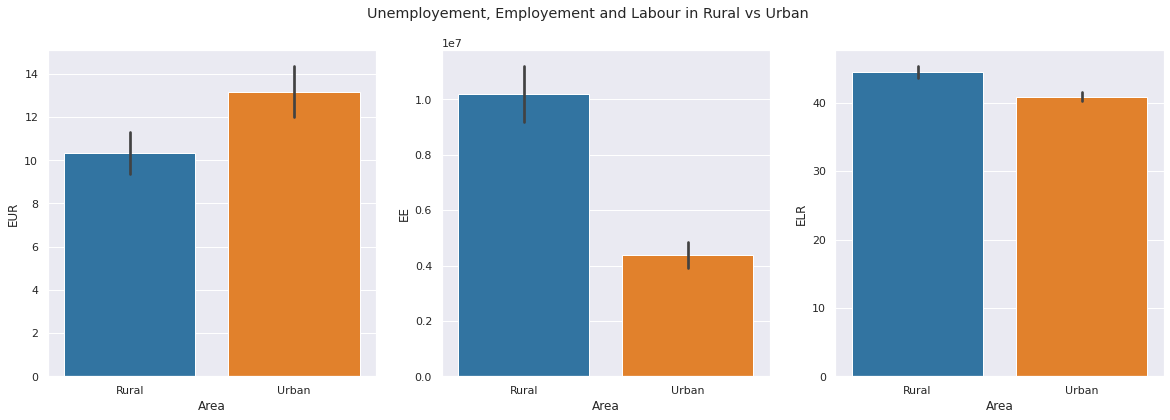

In [20]:
sns.set_context('notebook')
sns.set_style('darkgrid')
fig,ax = plt.subplots(1,3,figsize = (20,6))
cols = ['EUR','EE','ELR']
for i in range(len(ax)):
  sns.barplot(x = data1.Area, y = data1.loc[:,cols[i]],ax=ax[i])
  ax[i].set(ylabel=cols[i],xlabel = 'Area')
plt.suptitle('Unemployement, Employement and Labour in Rural vs Urban')

1. Urban has high Estimated Unemployment Rate.
2. Rural has high Estimated Employees.
3. Urban and Rural have similar Estimated Labour Participation Rate.